<img src="images/logo.png" style="width: 100px;"/>
<h1><center>Graded Assignment 1</center></h1>

<center>Due: 23.12.2020 at 23:59</center>

### How to upload:

Upload your solution via the VC course. Please upload **one Zip archive** per group. The Zip must contain:
* Your solution **notebook** (a **.ipynb** file)
* An **images folder** with all your images (keep the size of the images relatively small)
* A **data folder** with the datasets (you probably don't have to change anything here)

Your Zip should be named after the following scheme:

* assignment_graded\_"**assignment number**"\_solution.zip

__NOTE: This assignment will be graded and you can receive bonus points for the exam.__

# 1) Decision Tree Implementation (10 points)
In this first task, we will take a look at an implementation of the ID3 algorithm. 

For this task, we will use the mushroom dataset.

In [1]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("data/UCI_mushroom_data.csv", sep=",")
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The following helper methods are needed for the implementation of the **ID3 Algorithm**. <br>
__Do not change them.__

In [2]:
# Method for calculating the multiclass entropy of a dataset and a target attribute
def multiclass_entropy(data, target_attribute):
    labels = data[target_attribute]
    num_entries = len(labels)
    classes = labels.unique()
    
    entropy = 0
    for c in classes:
        n_selection = len(labels[labels == c])
        if n_selection == 0:
            entropy += 0
        else:
            p = n_selection / num_entries
            entropy += -p*np.log2(p)
    
    return entropy

# Method for calculating the information gain given a dataset, an attribute to check for and the target attribute
def information_gain(data, attribute, target_attribute):
    system_entropy = multiclass_entropy(data, target_attribute)
    num_entries = len(data)
    
    #print(system_entropy)
    #print(num_entries, "*****\n")
    
    relative_entropy = 0
    for v in data[attribute].unique():
        sv = data[data[attribute] == v]
        relative_frequency = len(sv) / num_entries
        entropy_sv = multiclass_entropy(sv, target_attribute)
        relative_entropy += relative_frequency * entropy_sv
    
    return system_entropy - relative_entropy

# structural classes needed for the ID3 implementation
class Node:
    def __init__(self):
        self.value = ""
        self.edges = []

class Edge:
    def __init__(self):
        self.label = ""
        self.node = None
        
# Method for printing a tree.
def print_tree(root):
    print(print_tree_at_layer(root, 0))
    
# Helper Method for printing a tree.
def print_tree_at_layer(tree, layer):
    text = str(tree.value)
    text += "\n"
    if not len(tree.edges) == 0:
        for e in tree.edges:
            text += "\t" * (layer+1)
            text += e.label + ": " + print_tree_at_layer(e.node, layer + 1)
    return text

Here is an implementation ot the **ID3 Algorithm**:
The parameters are:
- examples: dataset (pandas dataframe)
- target_attribute: the name of the target attribute column (str)
- attributes: a list of all attributes, column names, of the dataset (list)

In [3]:
def id3(examples, target_attribute, attributes):
    root = Node()
    
    unique_labels = examples[target_attribute].unique()
    
    # Create leaf node if there is only one unique label left
    if len(unique_labels) == 1:
        root.value = unique_labels[0]
        return root
    
    # Create leaf node if there are no more attributes left to split on
    # the classification is the label with the most occurances
    if len(attributes) == 0:
        root.value = examples[target_attribute].value_counts().idxmax()
        return root
    
    # Selecting the best attribute for branching (highest information gain)
    best_attribute = max(attributes, key=lambda a:information_gain(examples, a, target_attribute))
    #print(best_attribute)
    #print("-----\n\n")
    root.value = best_attribute
    
    # Create an edge for every unique value of the selected attribute
    # We use 'in data[..]' here, because otherwise we'd only create the branches necessary for our subset. If we
    # want to use this with new mushrooms down the line, that could cause problems (missing branches)
    for v in data[best_attribute].unique():
        edge = Edge()
        edge.label = v
        root.edges.append(edge)
        
        # Create a subset for each value of the selected attribute
        examples_v = examples[examples[best_attribute] == v]
        
        #print(examples_v)
        #print("^^^^\n\n")
        
        # Error Branch: Create Leaf when the dataset does not contain any more examples
        if len(examples_v) == 0:
            child = Node()
            child.value = examples[target_attribute].value_counts().idxmax()
            edge.node = child;
        # Main Branch: Do the next iteration of ID3
        else:
            new_attributes = [a for a in attributes if a != best_attribute]
            edge.node = id3(examples_v, target_attribute, new_attributes)
    
    return root

# Growing the tree and printing it.
decision_tree = id3(data, 
                    'poisonous', 
                    list(data.drop('poisonous', axis=1).columns))
print_tree(decision_tree)

odor
	p: 1
	a: 0
	l: 0
	n: spore-print-color
		k: 0
		n: 0
		u: 0
		h: 0
		r: 1
		w: cap-color
			n: 0
			y: 1
			w: 1
			g: 0
			e: 0
			p: 0
			b: 0
			c: 0
	f: 1
	c: 1
	m: 1



The ID3 algorithm has a lot of parameters to tweak for any given problem. One of these parameters is the selection criterion: How the algorithm chooses which attribute to use next to make a new split. You learned about the gain ratio in the lecture.

__Task 1.1 (3 points)__ Extend/Change the code below to change the selection criterion from the attribute with the highest information gain to the attribute with the highest __gain ratio__.

In [4]:
def gain_ratio(data, attribute, target_attribute):
    num_entries = len(data)
    splitInfo = 0
    
    for v in data[attribute].unique():
        sv = data[data[attribute] == v]
        relative_frequency = len(sv) / num_entries
        splitInfo += -(relative_frequency)*np.log2(relative_frequency)
        
    gain = information_gain(data, attribute, target_attribute)
    
    if(splitInfo == 0 ) : return 0
    return gain/splitInfo


def id3_gain_ratio(examples, target_attribute, attributes):
    root = Node()
    
    unique_labels = examples[target_attribute].unique()
    
    # Create leaf node if there is only one unique label left
    if len(unique_labels) == 1:
        root.value = unique_labels[0]
        return root
    
    # Create leaf node if there are no more attributes left to split on
    # the classification is the label with the most occurances
    if len(attributes) == 0:
        root.value = examples[target_attribute].value_counts().idxmax()
        return root
    
    # Selecting the best attribute for branching (highest information gain)
    best_attribute = max(attributes, key=lambda a:gain_ratio(examples, a, target_attribute))
    root.value = best_attribute
    
    # Create an edge for every unique value of the selected attribute
    # We use 'in data[..]' here, because otherwise we'd only create the branches necessary for our subset. If we
    # want to use this with new mushrooms down the line, that could cause problems (missing branches)
    for v in data[best_attribute].unique():
        edge = Edge()
        edge.label = v
        root.edges.append(edge)
        
        # Create a subset for each value of the selected attribute
        examples_v = examples[examples[best_attribute] == v]
        
        # Error Branch: Create Leaf when the dataset does not contain any more examples
        if len(examples_v) == 0:
            child = Node()
            child.value = examples[target_attribute].value_counts().idxmax()
            edge.node = child;
        # Main Branch: Do the next iteration of ID3
        else:
            new_attributes = [a for a in attributes if a != best_attribute]
            edge.node = id3_gain_ratio(examples_v,
                                       target_attribute,
                                       new_attributes)
    
    return root

# Growing the tree and printing it.
decision_tree_gain_ratio = id3_gain_ratio(data,
                                          'poisonous',
                                          list(data.drop('poisonous', axis=1).columns))
print_tree(decision_tree_gain_ratio)

odor
	p: 1
	a: 0
	l: 0
	n: veil-color
		w: ring-number
			o: gill-size
				n: bruises
					t: 1
					f: 0
				b: 0
			t: spore-print-color
				k: 1
				n: 1
				u: 1
				h: 1
				r: 1
				w: 0
			n: 0
		y: 1
	f: 1
	c: 1
	m: 1



Now the tree should become bigger than with the information gain selection criterion. To make the tree simpler one could prune the tree.

__Task 1.2 (3 points)__ Explain what it means to __pre-prune__ a decision tree and why __pre-pruning__ is applied. Which __pre-pruning method__ would you use? Why would you recommend this method and how does it affect the tree?

Answer: pre-pruning or early stopping involves stopping the tree before it has completed classifying the training set. Pre-pruning is applied on a branch when information becomes unreliable of that branch.
There are various approaches for the pre-pruning. But here, we will use minimal gain ratio pruning. This pre-pruning method will help us to build more efficent and smaller tree. In this method, if the calculated gain ratio for a particular feature split is greater than the set minimal gain ratio then there will be a split else it will just leave that feature as a leaf.

__Task 1.3 (4 points)__ Now implement one __pre-pruning__ method to your solution from Task 1.1 to give the decision tree pruning capabilities. You may need to change the method signature for this task. Start by copy/pasting your solution from Task 1.1 into the method below.

In [5]:
def id3_gain_ratio_and_pruning(examples, target_attribute, attributes, thresholdGainRatio):
    root = Node()
    
    unique_labels = examples[target_attribute].unique()
    
    # Create leaf node if there is only one unique label left
    if len(unique_labels) == 1:
        root.value = unique_labels[0]
        return root
    
    # Create leaf node if there are no more attributes left to split on
    # the classification is the label with the most occurances
    if len(attributes) == 0:
        root.value = examples[target_attribute].value_counts().idxmax()
        return root
    
    # Selecting the best attribute for branching (highest information gain)
    best_attribute = ''
    maxGainRatio = -11111;
    for a in attributes:
        gainRatio = gain_ratio(examples, a, target_attribute)
        if(gainRatio > maxGainRatio) :
            maxGainRatio = gainRatio
            best_attribute = a
        
    #best_attribute = max(attributes, key=lambda a:gain_ratio(examples, a, target_attribute))
    root.value = best_attribute
    #print(maxGainRatio)
    

    # Create an edge for every unique value of the selected attribute
    # We use 'in data[..]' here, because otherwise we'd only create the branches necessary for our subset. If we
    # want to use this with new mushrooms down the line, that could cause problems (missing branches)
    for v in data[best_attribute].unique():
        edge = Edge()
        edge.label = v
        root.edges.append(edge)
        
        # Create a subset for each value of the selected attribute
        examples_v = examples[examples[best_attribute] == v]
        
        # Error Branch: Create Leaf when the dataset does not contain any more examples
        if len(examples_v) == 0 or maxGainRatio < thresholdGainRatio:
            child = Node()
            #print(examples[target_attribute].value_counts())
            child.value = examples[target_attribute].value_counts().idxmax()
            edge.node = child;
        # Main Branch: Do the next iteration of ID3
        else:
            new_attributes = [a for a in attributes if a != best_attribute]
            edge.node = id3_gain_ratio_and_pruning(examples_v,
                                       target_attribute,
                                       new_attributes, thresholdGainRatio)
    
    return root

# Growing the tree and printing it.
decision_tree_gain_ratio = id3_gain_ratio_and_pruning(data,
                                          'poisonous',
                                          list(data.drop('poisonous', axis=1).columns), 0.4)
print_tree(decision_tree_gain_ratio)

odor
	p: 1
	a: 0
	l: 0
	n: veil-color
		w: ring-number
			o: gill-size
				n: 0
				b: 0
			t: spore-print-color
				k: 1
				n: 1
				u: 1
				h: 1
				r: 1
				w: 0
			n: 0
		y: 1
	f: 1
	c: 1
	m: 1



# 2) Hands on with Sklearn (27 points)
In this task, we will use sklearn to implement various machine learning algorithms.

We will start this task with the __mushroom dataset__, but later on, we will take a look at the __default rate of credit cards__ in a different dataset.

The following code imports pandas and sets a random seed variable. This variable is important, as some of the algorithms we will use are based on randomization and by using a random seed we can disable the randomness and get the same results in every run of the code. 

In [6]:
import pandas as pd

# Use this random_seed everywhere where you can set a random seed.
RANDOM_SEED = 42

## Mushroom Data

The following code loads and quickly inspects the mushroom data:

In [11]:
# Load the data
data = pd.read_csv("data/UCI_mushroom_data.csv", sep=",")
y_data = data["poisonous"]
x_data = data.drop("poisonous", axis=1)

feature_names = x_data.columns
class_names = y_data.name

data.head()
#print(x_data)
#print(y_data)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Before you continue, you need to transform the data, because the sklearn decision tree implementation only works with numerical data. So you need to **convert** all of the **string input** data into **numeric input** data (All columns need to be converted). 

This conversion can be done in various ways. First, we will use a **Label Encoder**. A label encoder converts every unique string value into a unique integer value. For Example, "red" becomes "1", "blue" becomes "2", and "green" becomes "3".

__Task 2.1 (2 points)__ <br>Take a look into sklearn.preprocessing.LabelEncoder on how to use it on your dataset. Remember every categorical (string) column needs to be transformed.

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(data)
df = df.apply(LabelEncoder().fit_transform)

#print(df)

__Task 2.2 (2 points)__ <br>After that, you need to split the dataset into a **Training Set** and a **Test Set**. The test set should contain **40%** of the dataset. Take a look at the sklearn package. Maybe you can find a good utility function to make a split.

In [27]:
from sklearn.model_selection import train_test_split

X_data = df[feature_names] # Features
y_data = df[class_names]

X_train, X_test, Y_train, Y_test = train_test_split( X_data, y_data, test_size=0.4)
#print(len(X_train), len(X_test), len(X_data))


3386 2258 5644


__Task 2.3 (1.5 point)__ <br>**Explain** why you need to split your data? Wouldn't it be better to train your model on the whole dataset you have available?

Answer:I need to split data to create train dataset, test dataset and validation dataset. No it wouldn't better. The “test” or “validation” datasets should be different from the “training” datasetas the “test” or “validation” data set is used to qualify the trained model performance.

__Task 2.4 (2 points)__ <br>**Explain** what it means to make a stratified split?

Answer:Startified split means grouping split.

Now, it's time to train the decision tree!

__Task 2.5 (4 points)__

1. Use the sklearn decision tree implemenation to **create** a DecisionTreeClassifier. For the criterion to select the best splitting-feature use the InformationGain ("entropy"). Don't forget the random seed.

2. **Train** a DecisionTreeClassifier with your **training data**. 

3. **Verify** the accuracy of your decision tree on your **training data**.

4. **Test** the accuracy of your decision tree on previously unseen data with the help of your **test data**. 

5. **Calculate** the F1-score for the **test data predictions** of your decision tree.

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn import metrics

# 1. Create the decision tree classifier
dtc = DecisionTreeClassifier(splitter = "best", criterion="entropy", random_state=40)

# 2. Train (Fit) the decision tree classifier with your training data
dtc = dtc.fit(X_train,Y_train)

# 3. Verify training on training data
score = dtc.score(X_test, Y_test)
print(score)

# 4. Test with test data
Y_pred = dtc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

# 5. Calculate F1-Score
print(f1_score(Y_test, Y_pred, average="macro"))

1.0
Accuracy: 1.0
1.0


One big advantage of big frameworks like sklearn is that, a lot of functionality around their classifiers is also implemented. For example, in the case of the decision tree it could be very intersting to see exactly how the decison tree looks.

What a coincedence. There is a very handy function implementet in sklearn for that. The only requirement for this is that you also have matplotlib installed.

__Task 2.6 (1 point)__ Use **sklearn** to draw your tree.

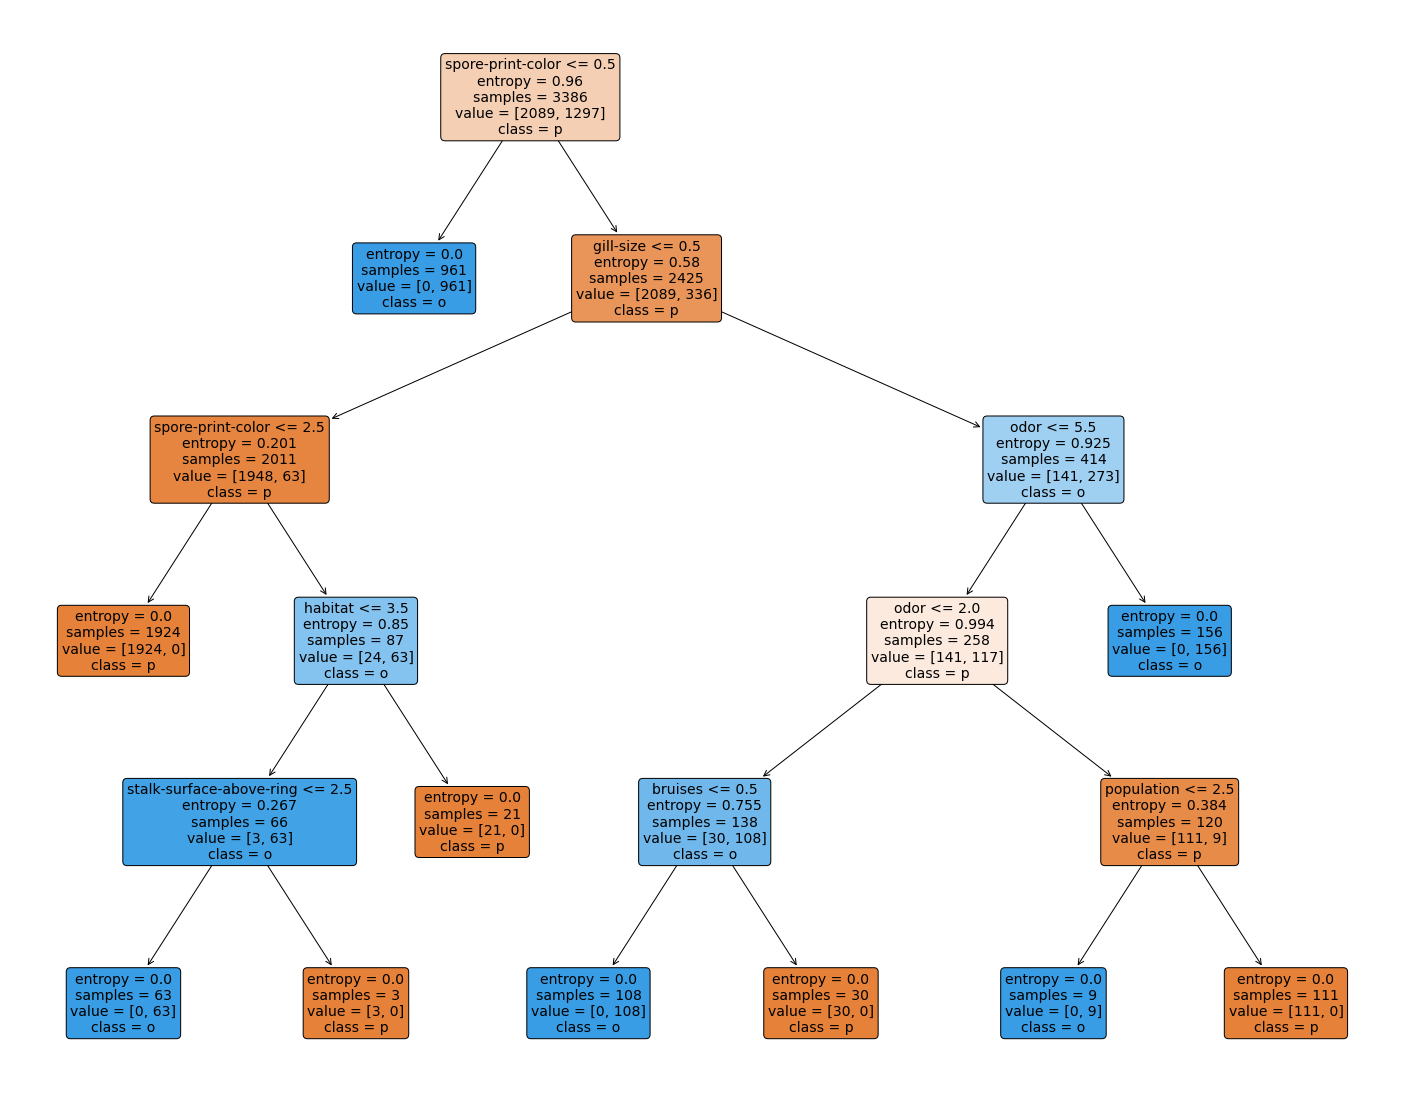

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))


plot_tree(dtc, 
              feature_names=feature_names, 
              class_names=class_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)

plt.show()

# feature_names and class_names are already defined in the cell where the data is loaded

Nice! With this function we can see what the decision tree really looks like. Use this representation to answer the following questions:

__Task 2.7 (1 point)__ <br>What **feature** is used for the **first split**?

Answer:spore_print_color

__Task 2.8 (1 point)__ <br>How many **leaf nodes** contain **less** than **100 samples**.

Answer:

__Task 2.9 (2.5 points)__ <br>
**Explain** why OneHotEncoding works closer to real-life than a label encoding, and thus why you should rather use OneHotEncoding over label encoding for categorical data. To answer this question, look closely at **how the sklearn decision tree splits the data** (Look at the decision at each decision-node). **Incorporate** the observed mechanism of sklearn’s decision tree into your answer.

Answer:

## Credit Card Defaults data

The following code snippet loads and quickly inspects the new dataset:

In [ ]:
# Load the data
data = pd.read_csv("data/default_of_credit_card_clients.csv", sep=";")
data = data.drop("ID", axis=1)

y_data = data["default"]
x_data = data.drop("default", axis=1)

data.head()

This dataset contains categorical and numerical features. You can take a look into the [dataset description](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).

The following code snippet is for your convinience.

In [ ]:
# list of all categorical features
categorical_columns = [
    "SEX", "MARRIAGE", "EDUCATION",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"
]
# List of all numerical features
numerical_columns = [
    "LIMIT_BAL", "AGE",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

### Feature Transformation and Normalization:

Now we again need to transform the features. However, there are categorical and numerical features in our dataset.

Of course, we need to transform the categorical features. To do so, we should use OneHotEncoding. 

But what should we do with the numerical features? The answer is normalization. It's not always necessary to normalize the data, but often it is essential for a good performance of our machine learning models.

__Task 2.10 (1.5 points)__ <br> **Explain** why it is a good idea to normalize numerical data for example with a StandardScaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Answer:

__Task 2.11 (3 points)__<br> Now transform and normalize the features.
- Transform the categorical features with OneHotEncoding (the pandas.get_dummies function could be very helpful)
- Normalize the numerical features with a StandardScaler (sklearn.preprocessing.StandardScaler)

Again, split your data into a training and a test set like you did in the previous taks. (You could reuse your code from 2.2)

In [ ]:
# code from Task 2.2

### Decision Tree
__Task 2.12 (0.5 points)__ <br>Reuse your sklearn decision tree code here on the credit card data. (Creating, Training, Verifying, Testing, F1-Score of the test predictions)

### Random Forest

__Task 2.13 (2 points)__ 

1. Use the sklearn **random forest** implemenation to **create** a RandomForestClassifier. For the criterion to select the best splitting-feature use the InformationGain ("entropy"). Don't forget the random seed.

2. **Train**  your random forest with your **training data**. 

2. **Verify** the accuracy of your random forest on your **training data**.

3. **Test** the accuracy of your random forest on previously unseen data with the help of your **test data**. 

4. **Calculate** the F1-score for the **test data predictions** of your random forest.

### Perceptron

__Task 2.14 (2 points)__ 

1. Use the **sklearn perceptron** implemenation to **create** a Perceptron. The stopping criterion (tol) should be 0.001. Don't forget the random seed. You can play around with the parameters.

2. **Train** your perceptron with your **training data**.

3. **Verify** the accuracy of your perceptron on your **training data**.

4. **Test** the accuracy of your perceptron on previously unseen data with the help of your **test data**. 

5. **Calculate** the F1-score for the **test data predictions** of your perceptron.

### Conclusion

__Task 2.15 (1 points)__ Interpret the results. What model performed best?

Answer:

# 3) Deep Learning (19 points)

We now want to train a Deep Learning model on an image classification task. For this we will use the framework *Keras*. Keras is a high-level neural network framework that allows straight-forward implementation and experimentation with networks that contain arbitrary layers. 

The framework is embedded in Google's efficient computation framework TensorFlow. So in order to use it, you have to install TensorFlow in the same conda environment you use to open this notebook. You can install it using the command __conda install tensorflow__. If you feel adventurous and have a GPU, you can also install a TensorFlow version with GPU support. For more information on that, see [here](https://www.tensorflow.org/install/gpu).

__Note that GPU support is NOT necessary to solve this task.__ The setup for CUDA and similar libraries can be complicated and lead to very device-specific problems. If you already have CUDA installed and you are getting errors, see the tips and tricks section point 2), there is one common issue we can provide a fix for. 

After installation you can get familiar with the overall workflow in Keras by
reading [this ressource](https://keras.io/guides/sequential_model/).

Feel free to use other tutorials or installation guides. There are many high quality guides freely available online, which contain specific instructions and walkthroughs for your setup and OS. Please contact us if you need any help with that.

We will implement a rather simple convolutional neural network that tackles the task of classifying input images into pre-defined classes. The dataset we
are going to use for this assignment is called *Fashion-MNIST*. It consists of
low-resolution images of 10 clothing categories.

Let us first obtain the dataset:

In [ ]:
import tensorflow
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The training/test images and labels are now loaded. Time to inspect the dataset a little:

The label-to-category matching is the following:

| Label   | Description |
|:-------:|:------------|
| 0 | T-Shirt/Top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Suppose you don't know what an ankle boot looks like (I had to google it ;).

__Task 3.1 (2 points)__ Find the very first image of an ankle boot in the loaded training dataset and show it with the visualization package of your choice. Also find out what the dimensions (width, height) of the images are.

__Task 3.2 (2 points)__ In order to use the images in a Convolutional Neural Network, we have to think about the input dimensions of our images. Along with the width and height of an image, we also need a color channel. The images are all grayscale, thus having only one value for every pixel in their 2D array. But Keras needs an explicit dimension expansion to incorporate a single color channel. This should make the current 2D array which represents one image (height x width) a 3D array (height x width x color). Perform this dimension expansion for your training and test images.

Additionally a CNN performs better with small floating point values for the pixel data. Therefore make sure that all your pixel values are normalized to fall in the range between 0.0 and 255.0.

__Task 3.3 (2 points)__

When you have a look at the given labels for the dataset you see that they are just single integers for the classes. CNNs can not work very well with such labels since the ordinal scale of the classes does not make sense (A T-Shirt can not be put in a meaningful order with a Trouser). Also in the end we want to have the same number of neurons as there are classes so that we can get estimators for each class for a particular instance. The solution here is called: One-hot encoding. So for the first point of this task, please describe in your own words what a one-hot encoding does to your integer labels:

Now for the second point, perform a one-hot encoding for your train and test labels.

__Hint__: The __utils__ package of Keras will help you greatly with that.

__Task 3.4 (2 points)__ Since our dataset only has the differentiation between a training and a test set, you will now have to manually do a validation split. Take the test data (images and labels) and divide them in half to receive a validation and a test set. The pairing of image and label is given by the order of the arrays.

__Task 3.5 (5 points)__ Now let us implement our own Convolutional Neural Network architecture with Keras. The structure has to be the following:

* Input layer that allows for the input of images preprocessed like above
* Convolution layer with 32 filters and a 3x3 weight kernel. Activation: ReLU
* Maxpooling layer using a 2x2 window
* Convolution layer with 64 filters and a 3x3 weight kernel. Activation: ReLU
* Maxpooling layer using a 2x2 window
* Flatten Layer
* Dense layer with 100 neurons and ReLU activation function
* Dropout layer with dropout rate 0.5
* Output layer with the number of output classes and Softmax activation.

__Task 3.6 (1 point)__ In order for the model to be trainable by Keras, we have to compile it. During compilation, several hyperparameters will also be given by the user. Compile your model to be trained with the optimizer strategy *Stochastic Gradient Descent*, a learning rate of 0.01 and a *momentum* of 0.9. Also find out what kind of loss you need for the output of your particular model and use that. As metrics, we want to have the accuracy.

__Task 3.7 (1 points)__ Describe now, in your own words what momentum is in the context of gradient descent.

Answer:

__Task 3.8 (2 points)__ We now want to train our model for 10 epochs with the training data and validate it simultaneously with our validation data. How is this done in Keras?

Also we want to include a technique called *Early stopping*. Read about what that does and include it in your training. We want to monitor the validation loss and have a patience of 3. Also the best weights should be restored.

__Task 3.9 (1 point)__ Now shortly explain how Early Stopping can help to find better models.

Answer:

__Task 3.10 (1 point)__ Finally, let us make use of the left out test data and evaluate our model again on the test data. Is there a sign of overfitting with respect to the test data?

---
# Tips and tricks

### 1) CUDA issues
One rather common error message concerns a problem with 'cudnn', and a message that the convolution could not be found: "Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above."   
In that case, copy the following code, insert it in the first code field after the description of task 3 begins, remove the '*#*' from all lines, and execute that code field again.

In [ ]:
#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession
#config = ConfigProto()
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)

If you are using CUDA with an NVidia RTX 3000-Series GPU, pay very close attention to the "Hardware Requirements" points on [here](https://www.tensorflow.org/install/gpu). Also notice which Tensorflow version you are using, as the older ones may not be compatible with you new GPU.

### 2) Embedding images
You can embed images in a jupyter notebook on two ways: <br/>
First, you can use the IPython kernel to draw an image everytime the code cell is run like shown below.

In [ ]:
from IPython.display import Image
Image("images/logo.png")

Second, you can embed images directly in a Markdown cell as shown below. You can either use markdown syntax or write plain HTML code. Sometimes HTML code is more practical, as you have much finer control over the HTML elements.

1. Markdown syntax:
![title](images/logo.png)
2. HTML syntax
<img src="images/logo.png" style="width: 70px;"/>

If you are having trouble with **markdown images not refreshing after you change them on disk** you need to refresh your browser. The browser chaches images and the old image is still in the cache.